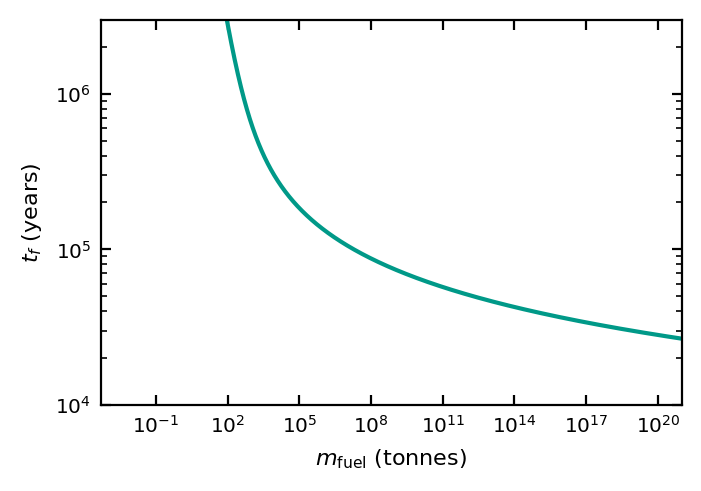

speed 125916.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def both_ticks(fontsize):
    plt.tick_params(axis='both', which='major', direction="in", labelsize=fontsize*0.9, top=True, right=True)
    plt.tick_params(axis='both', which='minor', direction="in", top=True, right=True)

colours = [
    "#0077BB",  # Blue
    "#33BBEE",  # Cyan
    "#009988",  # Teal
    "#EE7733",  # Orange
    "#CC3311",  # Red
    "#EE3377",  # Magenta
]

m0_mf = np.logspace(0.1, 100, int(1e6))

v_e = 4400 # check this number
seconds_year = 3.156e7
c = 2.998e8
g=9.8
light_year = c * seconds_year
x = (4.2 * light_year)
acc = 1e5
trips = 2

fontsize=8

def travel_time_to_mass_ratio(init_to_empty_ratio):
    A= 4 * x / acc
    B= (( v_e / (trips *acc)) * np.log(init_to_empty_ratio))
    return (A + B**2) / (2 * B)

m_payload = 2e5
plt.figure(figsize=[3*1.25,2*1.25], dpi=200)
plt.plot((m0_mf * m_payload - m_payload) / 1000, 
         travel_time_to_mass_ratio(m0_mf)/seconds_year,
         c= colours[2]
         )

plt.xscale("log")
plt.yscale("log")
plt.ylim(1e4,3e6)
plt.xlim(None,1e21)

plt.rc('text', usetex=True)  # Enable LaTeX
plt.xlabel("$m_{\mathrm{fuel}}$ (tonnes)", fontsize=fontsize)
plt.ylabel("$t_f$ (years)", fontsize=fontsize)
plt.rc('text', usetex=False)  # Disable LaTeX
both_ticks(fontsize)
plt.show()


print("speed", x/(1e4 * seconds_year))